# Given the e-commerce data in cust_data.xlsx, use k-means clustering algorithm to cluster customers with similar interest.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("cust_data.xlsx")
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [4]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [5]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [6]:
df.isnull().sum()/len(df)*100

Cust_ID                   0.00
Gender                    9.08
Orders                    0.00
Jordan                    0.00
Gatorade                  0.00
Samsung                   0.00
Asus                      0.00
Udis                      0.00
Mondelez International    0.00
Wrangler                  0.00
Vans                      0.00
Fila                      0.00
Brooks                    0.00
H&M                       0.00
Dairy Queen               0.00
Fendi                     0.00
Hewlett Packard           0.00
Pladis                    0.00
Asics                     0.00
Siemens                   0.00
J.M. Smucker              0.00
Pop Chips                 0.00
Juniper                   0.00
Huawei                    0.00
Compaq                    0.00
IBM                       0.00
Burberry                  0.00
Mi                        0.00
LG                        0.00
Dior                      0.00
Scabal                    0.00
Tommy Hilfiger            0.00
Holliste

In [7]:
df['Gender'].unique()

array(['M', 'F', nan], dtype=object)

We have to remove null values. Column has object data type so we have to replace nan values with mode.But lets see count of both Male and Female records.

<AxesSubplot:xlabel='Gender', ylabel='count'>

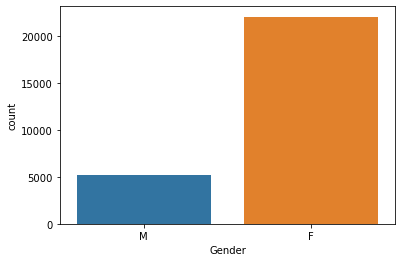

In [8]:
sns.countplot(df['Gender'])

In [9]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [10]:
gen={'M':1, 'F':0}
df['Gender']=df['Gender'].map(gen)

In [11]:
df['Gender']=df['Gender'].replace(np.nan,df['Gender'].mode()[0])

In [12]:
df['Gender'].value_counts()

0.0    24778
1.0     5222
Name: Gender, dtype: int64

In [13]:
df['Gender']=df['Gender'].astype('int64')

In [14]:
df.dtypes

Cust_ID                   int64
Gender                    int64
Orders                    int64
Jordan                    int64
Gatorade                  int64
Samsung                   int64
Asus                      int64
Udis                      int64
Mondelez International    int64
Wrangler                  int64
Vans                      int64
Fila                      int64
Brooks                    int64
H&M                       int64
Dairy Queen               int64
Fendi                     int64
Hewlett Packard           int64
Pladis                    int64
Asics                     int64
Siemens                   int64
J.M. Smucker              int64
Pop Chips                 int64
Juniper                   int64
Huawei                    int64
Compaq                    int64
IBM                       int64
Burberry                  int64
Mi                        int64
LG                        int64
Dior                      int64
Scabal                    int64
Tommy Hi

In [15]:
df.drop(columns=['Cust_ID'],inplace=True)

In [16]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Gender', ylabel='Orders'>

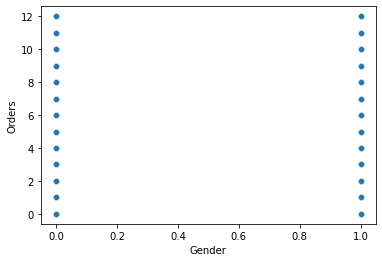

In [17]:
sns.scatterplot(x=df['Gender'],y=df['Orders'])

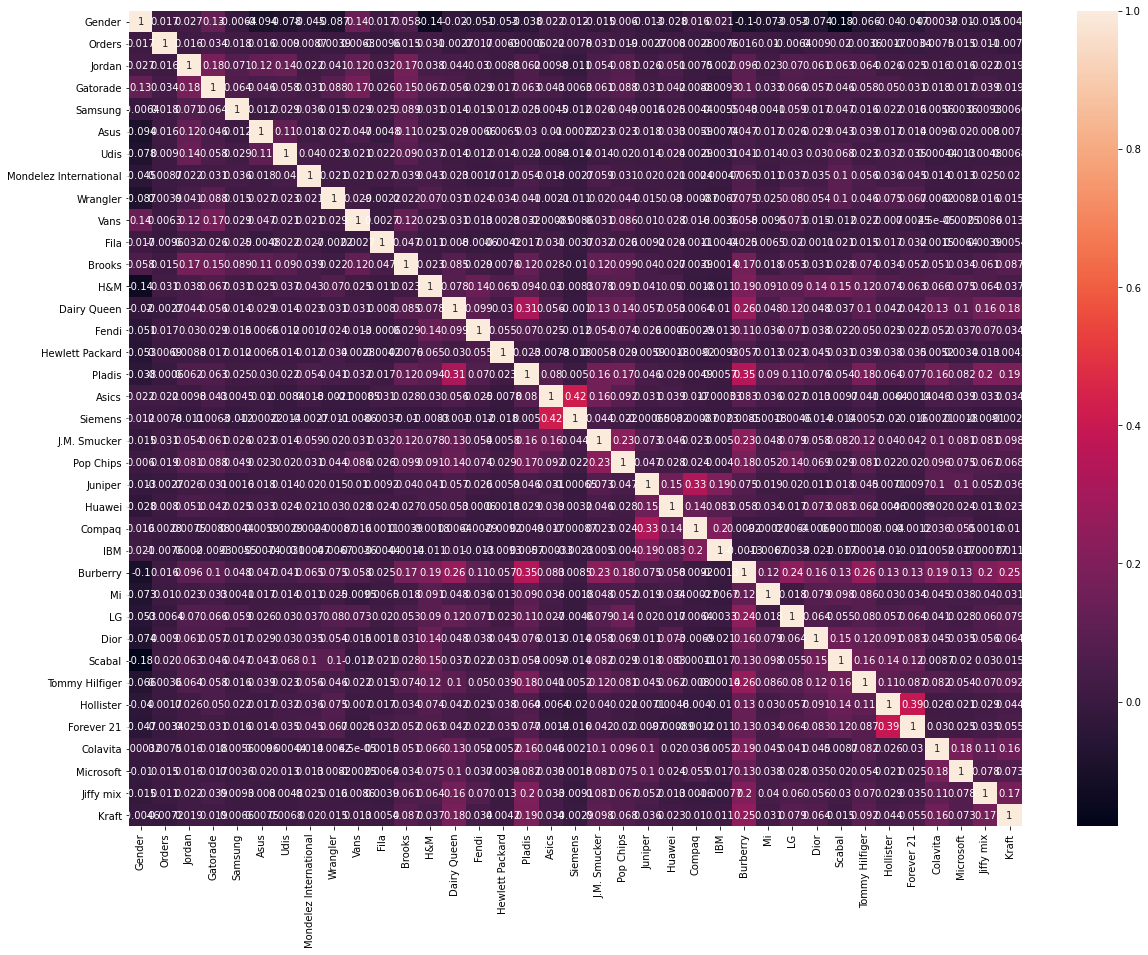

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

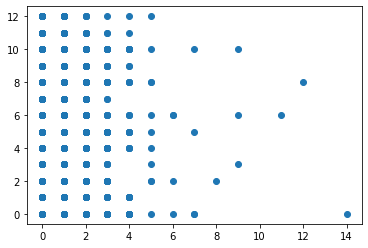

In [20]:
plt.scatter(df['Microsoft'],df['Orders'])

<AxesSubplot:xlabel='Jordan', ylabel='Orders'>

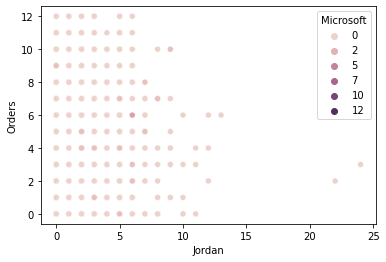

In [21]:
sns.scatterplot(x=df['Jordan'],y=df['Orders'],hue=df['Microsoft'])

<AxesSubplot:xlabel='Microsoft', ylabel='Jordan'>

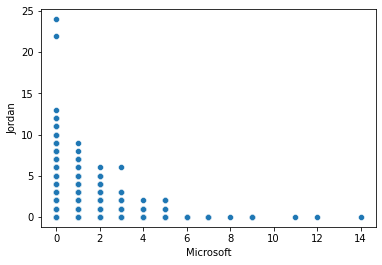

In [24]:
sns.scatterplot(x=df['Microsoft'],y=df['Jordan'])

<AxesSubplot:xlabel='Microsoft', ylabel='Asus'>

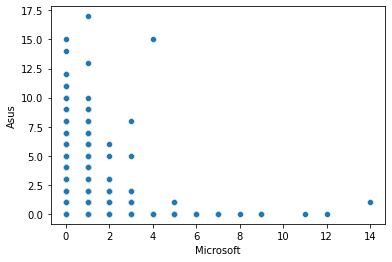

In [25]:
sns.scatterplot(x=df['Microsoft'],y=df['Asus'])

In [26]:
df.dtypes

Gender                    int64
Orders                    int64
Jordan                    int64
Gatorade                  int64
Samsung                   int64
Asus                      int64
Udis                      int64
Mondelez International    int64
Wrangler                  int64
Vans                      int64
Fila                      int64
Brooks                    int64
H&M                       int64
Dairy Queen               int64
Fendi                     int64
Hewlett Packard           int64
Pladis                    int64
Asics                     int64
Siemens                   int64
J.M. Smucker              int64
Pop Chips                 int64
Juniper                   int64
Huawei                    int64
Compaq                    int64
IBM                       int64
Burberry                  int64
Mi                        int64
LG                        int64
Dior                      int64
Scabal                    int64
Tommy Hilfiger            int64
Holliste

In [27]:
X=df
X

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(X)
y_pred

array([1, 3, 1, ..., 0, 0, 2])

In [29]:
df['cluster']=y_pred

In [30]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# elbow method
from sklearn.metrics import silhouette_score
wcss=[]
sil_score={}
k_range=np.arange(2,10,1)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_) # error in clustering(same as mse)
    sil_score[i]=silhouette_score(X,km.labels_,metric='euclidean')

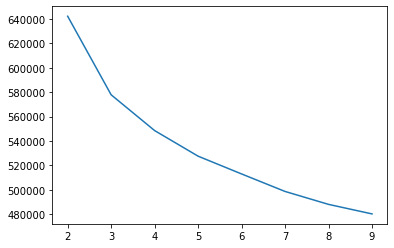

In [32]:
plt.plot(k_range,wcss)

In [33]:
s=sil_score
s

{2: 0.33161767053603275,
 3: 0.23812032362393007,
 4: 0.22999777012624667,
 5: 0.23263005072936602,
 6: 0.17367382475410018,
 7: 0.17511077634534267,
 8: 0.17661832045904238,
 9: 0.14671876775016127}

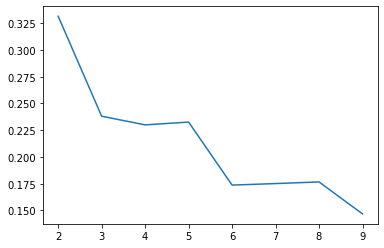

In [34]:
plt.plot(k_range,s.values())

In [35]:
from sklearn.cluster import KMeans
km1=KMeans(n_clusters=3)
y_predd=km1.fit_predict(X)
y_predd

array([1, 2, 1, ..., 2, 2, 0])

In [36]:
df['cluster']=y_predd

In [37]:
# elbow method
from sklearn.metrics import silhouette_score
wcss=[]
sil_score={}
k_range=np.arange(2,10,1)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_) # error in clustering(same as mse)
    sil_score[i]=silhouette_score(X,km.labels_,metric='euclidean')

In [38]:
s=sil_score
s

{2: 0.3324767766244067,
 3: 0.23380623407679088,
 4: 0.22969950721789434,
 5: 0.2319574589013857,
 6: 0.23333071912328074,
 7: 0.17430523099719575,
 8: 0.1744726370861647,
 9: 0.16367315919140712}

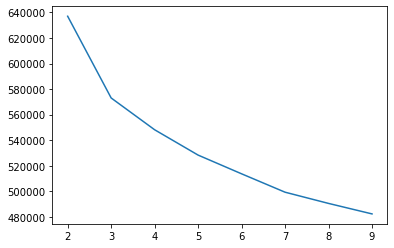

In [39]:
plt.plot(k_range,wcss)

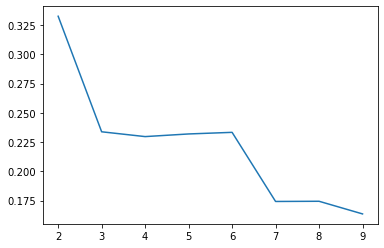

In [40]:
plt.plot(k_range,s.values())